In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio as play_audio
import numpy as np

paths = ("congas_82_25_1.wav", "single notes hoch.wav")
window_len = 4 # in seconds
signals = []
for path in paths:
    y, sr = librosa.load(path, sr=44100)
    windowed_y = y[0:int(window_len*sr)]
    display(play_audio(windowed_y, rate=sr, normalize=True))
    signals.append(windowed_y / max(abs(windowed_y)))
t = np.arange(0, sr*window_len, 1) / sr

# Notes on input classes

- Drums:
- Melody:
- Vocals:
- Bass:

# Notes on features
- Tonality coefficient
- normalized DBFS

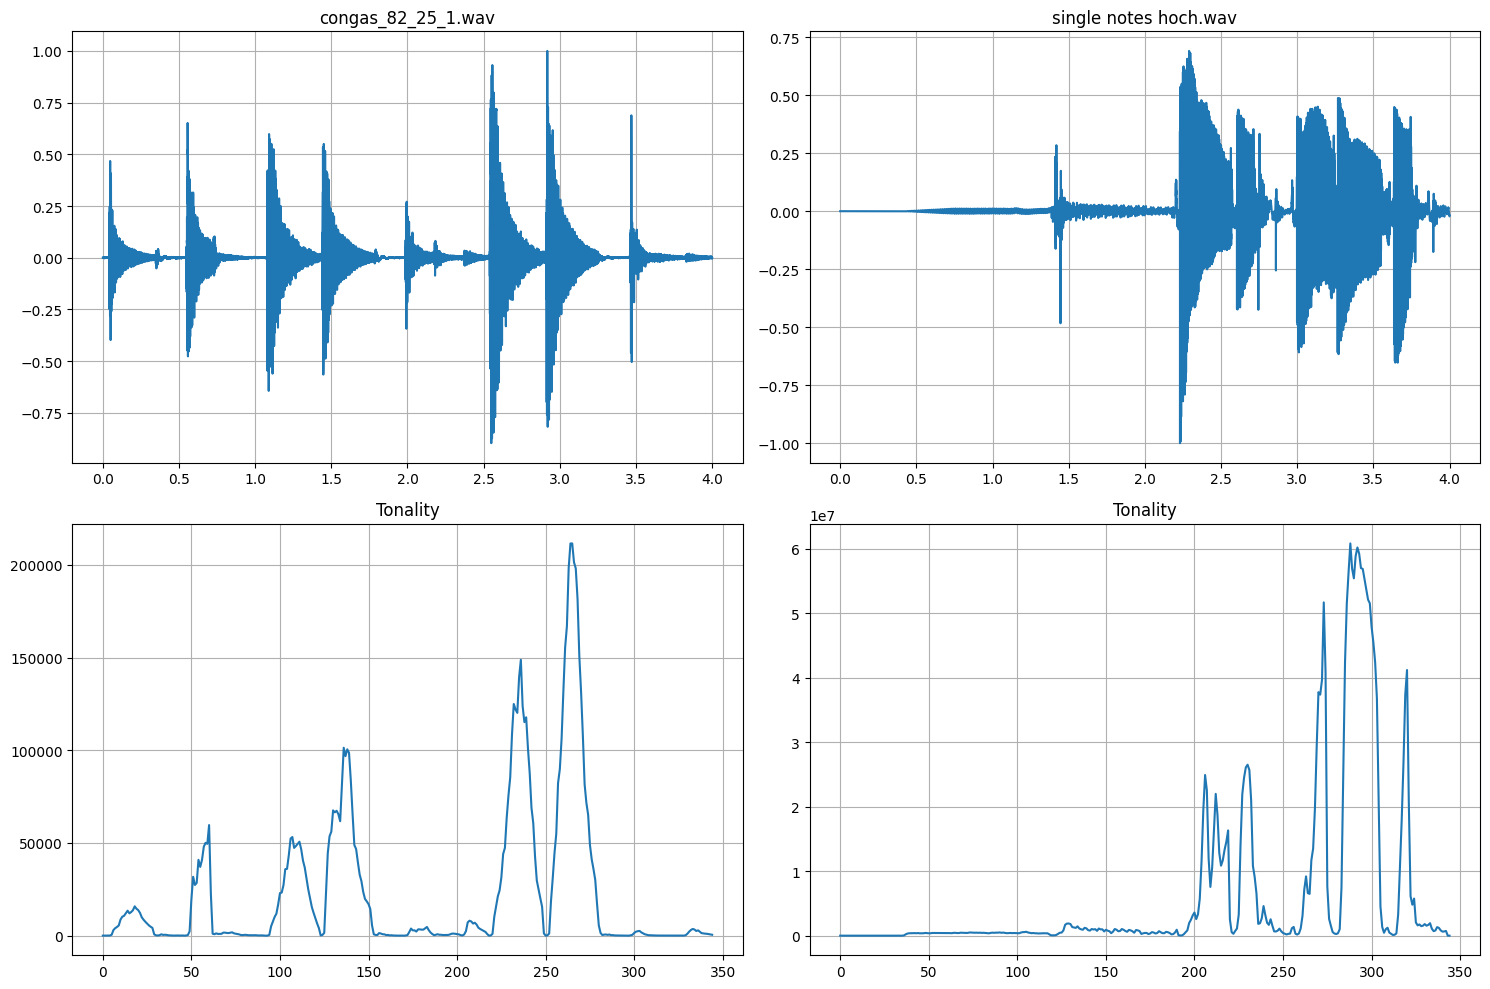

In [50]:
fig, ax = plt.subplots(len(signals),2, figsize=(15, 10))

for i, sig in enumerate(signals):
    flatness = librosa.feature.spectral_flatness(y=sig)
    ax[0][i].plot(t, sig)
    ax[0][i].grid()
    ax[0][i].set(title=f"{paths[i]}", xlabel=None)

    ax[1][i].grid()
    ax[1][i].plot((1/flatness.T), label='Tonality')
    ax[1][i].set(title='Tonality')

plt.tight_layout()
plt.show()

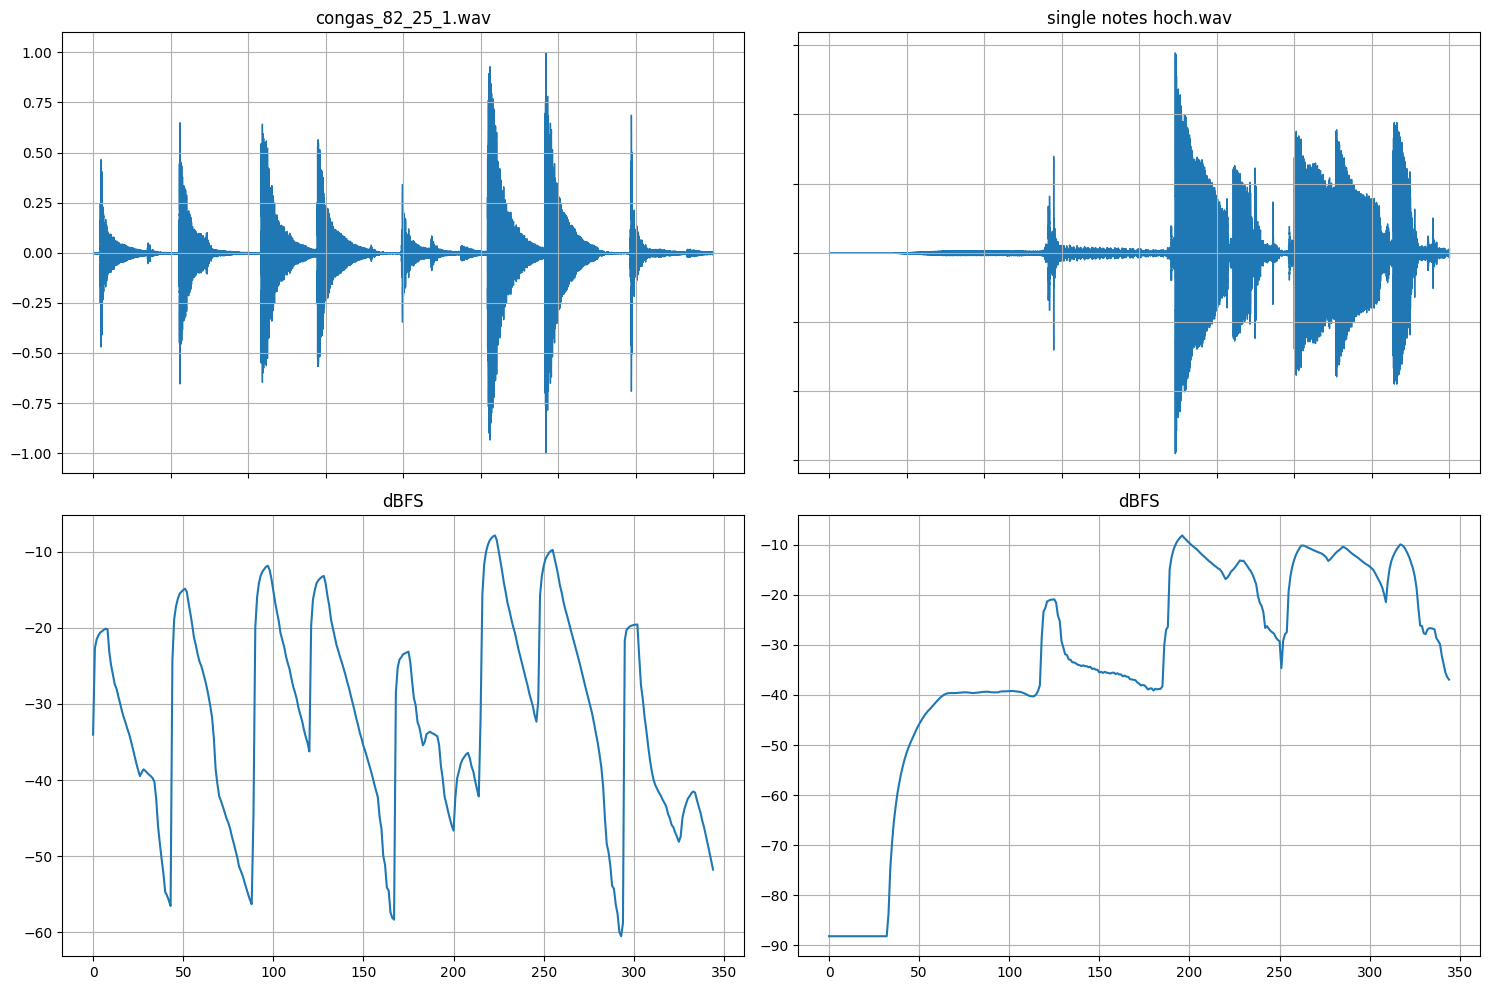

In [20]:
block_size = 4096
fig, ax = plt.subplots(len(signals),2, figsize=(15, 10))#, sharey=True)

for i, sig in enumerate(signals):
    rms = librosa.feature.rms(y=sig, frame_length=block_size)
    dbfs_values = librosa.amplitude_to_db(rms[0], ref=1.0)

    librosa.display.waveshow(sig, sr=sr, ax=ax[0][i])
    ax[0][i].grid()
    ax[0][i].set(title=f"{paths[i]}", xlabel=None)
    ax[0][i].label_outer()

    ax[1][i].grid()
    ax[1][i].plot(dbfs_values, label='dBFS')
    ax[1][i].set(title='dBFS')

plt.tight_layout()
plt.show()